In [1]:
import openeo
import xarray
import matplotlib.pyplot as plt

In [2]:
connection = openeo.connect("openeo.dataspace.copernicus.eu")

In [3]:
connection.authenticate_oidc()

Authenticated using refresh token.


<Connection to 'https://openeo.dataspace.copernicus.eu/openeo/1.1/' with OidcBearerAuth>

In [12]:
cube_darmstadt = connection.load_collection(
    "SENTINEL2_L2A",
    temporal_extent=(
        "2023-01-01",
        "2023-10-26"
    ),
    spatial_extent={
        "west": 8.559718,
        "south": 49.794677,
        "east": 8.752842,
        "north": 49.952662,
        "crs": "EPSG:4326",
    },
    bands=[
        'B02',
        'B03',
        'B04',
        'B8A'
    ],
    max_cloud_cover=10,
)

In [11]:
cube_darmstadt.download("load-raw.nc")

ReadTimeout: HTTPSConnectionPool(host='openeo.dataspace.copernicus.eu', port=443): Read timed out. (read timeout=1800)

In [ ]:
ds = xarray.load_dataset("load-raw.nc")

In [26]:
# Convert xarray DataSet to a (bands, t, x, y) DataArray
data = ds[["B04", "B03", "B02"]].to_array(dim="bands")

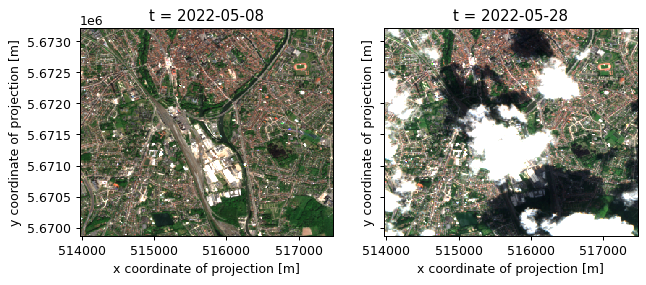

In [27]:
fig, axes = plt.subplots(ncols=2, figsize=(8, 3), dpi=90, sharey=True)
data[{"t": 0}].plot.imshow(vmin=0, vmax=2000, ax=axes[0])
data[{"t": -1}].plot.imshow(vmin=0, vmax=2000, ax=axes[1])